# Springboard - Data Science Career Track - Capstone 1

In [142]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

In [143]:
# Read in data from CSV
df = pd.read_csv('allCongressDataPublish.csv')

# Inspect the data
df.describe()

,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,over25k,...,numCosp,numPassH,numEnact,passPrcnt,congNum,demSeats,repSeats,otherSeats,ses,sesNorm
count,7097.000000,9312.000000,9.312000e+03,9312.000000,4886.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,...,9405.000000,9405.000000,9405.000000,9256.000000,9410.000000,9410.000000,9410.000000,9410.000000,9.312000e+03,9312.000000
mean,1.694423,16.199663,8.279402e+05,8.245649,42.013483,214168.778458,9.390199,90.607782,83.863417,74.306194,...,201.579692,1.402233,0.698352,5.145885,103.015515,239.817003,194.659299,0.523698,-5.367869e-12,32.484460
std,1.832497,9.428621,1.011553e+06,9.837913,10.109182,48579.331461,5.637967,5.640051,6.877721,8.529183,...,116.714652,2.353205,1.350962,10.377175,6.057714,31.101353,30.807539,0.663426,8.612999e-01,16.654482
min,0.000000,0.700000,3.766190e+05,0.074021,13.800000,106181.000000,1.344659,66.998284,56.001452,43.200000,...,0.000000,0.000000,0.000000,0.000000,93.000000,193.000000,143.000000,0.000000,-1.679960e+00,0.000000
25%,0.522004,7.300000,5.309882e+05,1.809899,34.360372,173228.000000,5.132383,87.569965,80.000000,68.600000,...,121.000000,0.000000,0.000000,0.000000,98.000000,207.000000,176.000000,0.000000,-6.267757e-01,20.364844
50%,0.996445,16.000000,6.394565e+05,4.484447,42.319545,210206.000000,8.000000,92.017785,85.125675,75.100000,...,179.000000,1.000000,0.000000,0.000000,103.000000,243.000000,192.000000,0.000000,-1.855156e-01,28.897247
75%,2.114737,22.562300,7.149890e+05,10.500000,49.700000,253318.000000,12.461961,94.900000,88.700000,80.453940,...,257.000000,2.000000,1.000000,7.142857,108.000000,258.000000,226.000000,1.000000,4.746309e-01,41.662135
max,15.633396,54.858657,1.401422e+07,60.800000,71.000000,405869.000000,33.001716,98.655341,97.100000,94.012948,...,947.000000,33.000000,22.000000,100.000000,113.000000,292.000000,242.000000,2.000000,3.491620e+00,100.000000


In [144]:
# Delete unneeded columns
del df['abroadPrcnt']
del df['prcntExAliens']
del df['totalHouseholds']
del df['meanIncome']
del df['medianIncome']
del df['totalEmploymentPop']
del df['prcntNotEmploy']
del df['totalPopRaceFile']
del df['prcntBlackNotHisp']
del df['prcntMulti']
del df['prcntWhite']
del df['prcntNotHisp']
del df['prcntOld']
del df['medianAge']
del df['sponID']
del df['icpsr']
del df['state']
del df['district']
del df['lastName']
del df['firstName']
del df['middleName']
del df['age']
del df['gender']
del df['numberTerms']
del df['daysServed']
del df['fracServed']
del df['cd']
del df['statenm']
del df['dwnom1']
del df['dwnom2']
del df['comPower']
del df['chair']
del df['rank']
del df['comName']
del df['numCom']
del df['rankChair']
del df['black']
del df['hispanic']
del df['numSpon']
del df['numCosp']
del df['numPassH']
del df['numEnact']
del df['passPrcnt']
del df['partyControl']
del df['demSeats']
del df['repSeats']
del df['otherSeats']
del df['ses']
del df['sesNorm']

# Describe the data
df.describe()

,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,over75k,...,over200k,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,congNum
count,9312.000000,9.312000e+03,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,...,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9312.000000,9410.000000
mean,16.199663,8.279402e+05,8.245649,9.390199,90.607782,83.863417,74.306194,61.674934,45.942324,27.715459,...,2.168106,4.760931,19.946112,71.517403,2.952052,11.386237,9.980803,72.109506,0.370931,103.015515
std,9.428621,1.011553e+06,9.837913,5.637967,5.640051,6.877721,8.529183,10.369699,11.900707,10.949647,...,2.508589,2.915304,10.374466,15.559808,5.531153,14.646916,14.627979,23.576277,0.157564,6.057714
min,0.700000,3.766190e+05,0.074021,1.344659,66.998284,56.001452,43.200000,29.205036,16.490626,6.400000,...,0.041587,1.192474,1.906013,24.586055,0.004082,0.012149,0.166042,3.158279,0.032949,93.000000
25%,7.300000,5.309882e+05,1.809899,5.132383,87.569965,80.000000,68.600000,54.400000,37.385944,19.400000,...,0.715248,2.736828,11.886034,59.648148,0.343950,2.300000,1.434007,61.607353,0.372793,98.000000
50%,16.000000,6.394565e+05,4.484447,8.000000,92.017785,85.125675,75.100000,61.599035,45.068233,25.998169,...,1.301726,3.800000,18.100000,75.200000,1.151466,5.641133,3.702759,79.285090,0.439405,103.000000
75%,22.562300,7.149890e+05,10.500000,12.461961,94.900000,88.700000,80.453940,68.634682,53.552165,34.254053,...,2.600000,6.000000,25.600000,84.800000,3.000000,14.000000,12.034055,90.200465,0.475321,108.000000
max,54.858657,1.401422e+07,60.800000,33.001716,98.655341,97.100000,94.012948,90.500000,82.400000,68.700000,...,22.200000,27.500000,68.800000,96.600000,68.100000,92.111006,87.700000,99.399399,0.607980,113.000000


In [145]:
# Remove rows with missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Remove 'Independent' rows contained in 'party' from the data 
df = df[df['party'] != 'Independent']

# Replace 'Republican-Conservative' rpws with 'Republican' in the data
df = df.replace(to_replace='Republican-Conservative', value='Republican')

# Convert non-numerical data using one-hot encoding
df = pd.get_dummies(df, columns=['party'])

# Delete the 'party_Republican' column
del df['party_Republican']

# Inspect the data
df.describe()

,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,over75k,...,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,congNum,party_Democrat
count,9298.000000,9.298000e+03,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,...,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000
mean,16.196689,8.282441e+05,8.252695,9.391937,90.606105,83.862999,74.309650,61.682146,45.952538,27.727471,...,4.763243,19.941432,71.508953,2.955070,11.395238,9.994112,72.080806,0.370869,103.010217,0.551086
std,9.432180,1.012281e+06,9.843466,5.640034,5.642126,6.881058,8.533876,10.374213,11.905249,10.952529,...,2.916755,10.376256,15.559791,5.534704,14.650549,14.634927,23.577642,0.157629,6.062225,0.497410
min,0.700000,3.766190e+05,0.074021,1.344659,66.998284,56.001452,43.200000,29.205036,16.490626,6.400000,...,1.192474,1.906013,24.586055,0.004082,0.012149,0.166042,3.158279,0.032949,93.000000,0.000000
25%,7.274256,5.304970e+05,1.809899,5.108096,87.566311,80.000000,68.600000,54.400000,37.400000,19.400000,...,2.730719,11.885885,59.596584,0.343950,2.318938,1.434529,61.602702,0.372751,98.000000,0.000000
50%,16.000000,6.399370e+05,4.488651,8.000000,92.017785,85.125675,75.100000,61.600000,45.075094,26.000000,...,3.800000,18.100000,75.200000,1.155274,5.655955,3.793049,79.278190,0.439384,103.000000,1.000000
75%,22.562300,7.151225e+05,10.512997,12.461961,94.900000,88.700000,80.464604,68.634682,53.581776,34.300000,...,6.000000,25.587640,84.700000,3.000000,14.000000,12.034663,90.200000,0.475321,108.000000,1.000000
max,54.858657,1.401422e+07,60.800000,33.001716,98.655341,97.100000,94.012948,90.500000,82.400000,68.700000,...,27.500000,68.800000,96.600000,68.100000,92.111006,87.700000,99.399399,0.607980,113.000000,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


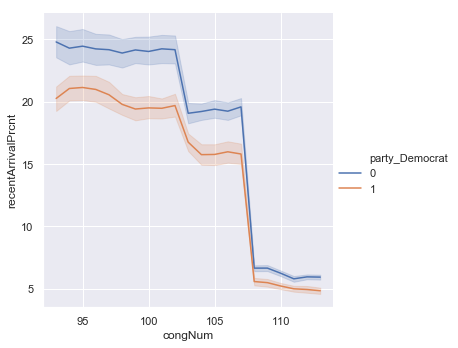

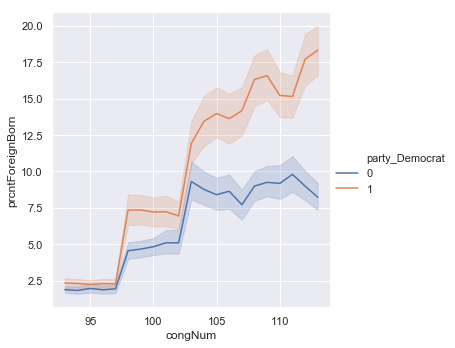

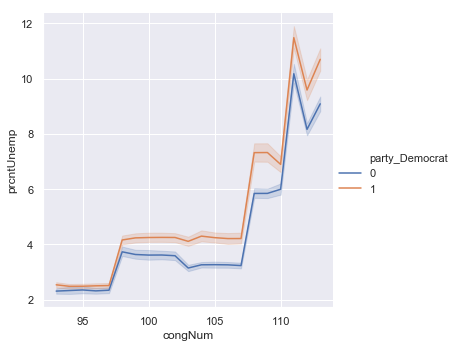

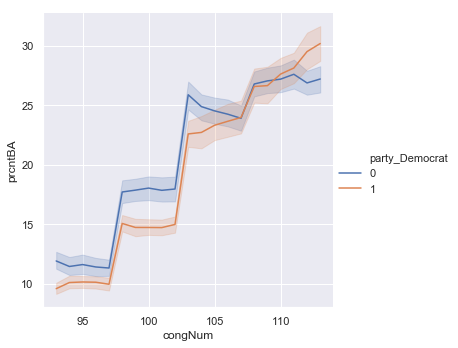

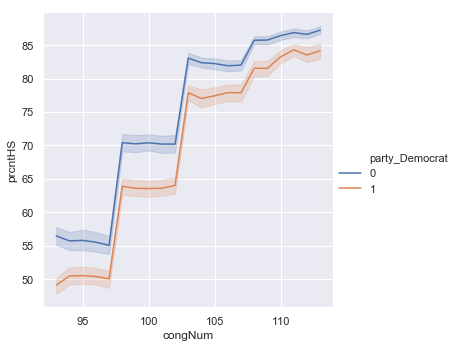

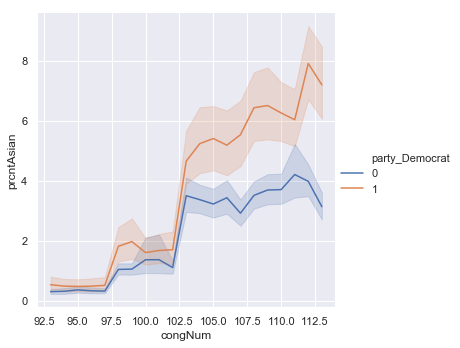

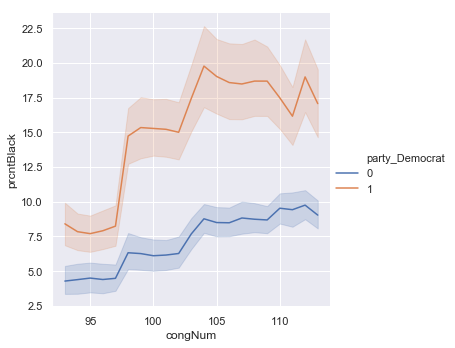

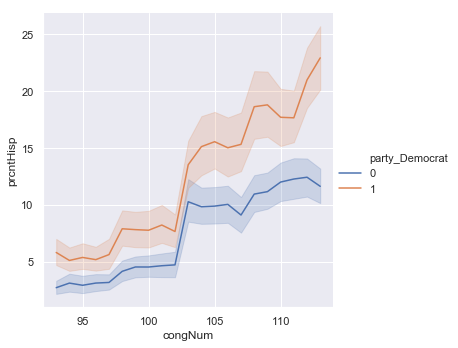

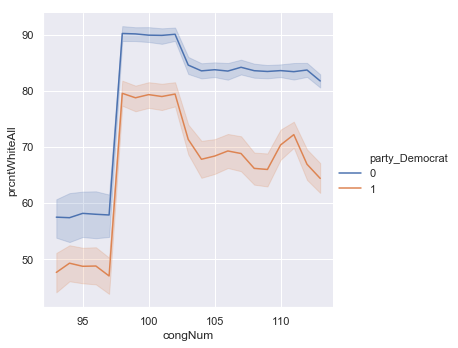

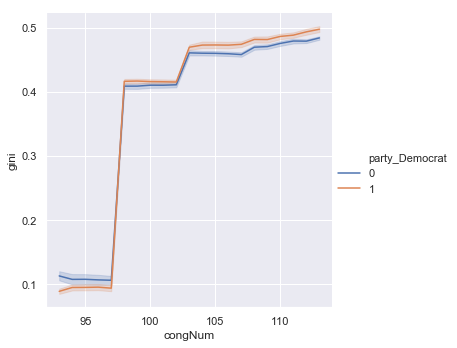

In [146]:
# Set the aesthetic style of the plots
sns.set(style='darkgrid')

# Perform graphical EDA on recentArrivalPrcnt
sns.relplot(x='congNum', y='recentArrivalPrcnt', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntForeignBorn
sns.relplot(x='congNum', y='prcntForeignBorn', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntUnemp
sns.relplot(x='congNum', y='prcntUnemp', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntBA
sns.relplot(x='congNum', y='prcntBA', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntHS
sns.relplot(x='congNum', y='prcntHS', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntAsian
sns.relplot(x='congNum', y='prcntAsian', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntBlack
sns.relplot(x='congNum', y='prcntBlack', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntHisp
sns.relplot(x='congNum', y='prcntHisp', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on prcntWhiteAll
sns.relplot(x='congNum', y='prcntWhiteAll', hue='party_Democrat', kind='line', data=df)

# Perform graphical EDA on gini
sns.relplot(x='congNum', y='gini', hue='party_Democrat', kind='line', data=df)

#### Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

In general, it appears that there are large, national changes in certain variables that affect Democratic and Republican districts in the same way. For example, according to the graph plotting **recentArrivalPrcnt** there has been a distinct reduction in the mobility of Americans. The **recentArrivalPrcnt** variable tracks the percent of the district that recently moved into the district from another county or state. It definitely appears that between the 100th and 110th Congresses, there was a distinct reduction in the percentage of the district that recently moved into the district from another county or state, suggesting that fewer people are moving around the country - that people are more locked into their districts than they were in the past.

In addition, it appears that the percent of the district that was born in a foreign country has also increased in both Democratic and Republican districts - though this trends is significantly more pronounced in Democratic districts.

It also appears that the unemployment rates have increased significantly in both districts while High School and College graduation rates have increased as well in both Democratic and Republican districts.

Finally, it appears that inequality has increased (as measured by the gini coefficient - a smaller gini value signifying a more equal district) in both Democratic and Republican districts. 


#### Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Of course, we are more interested in those things that differentiate Democratic and Republican districts. Though many of these national trends are represented in both types of district, we also see many of these trends are being more pronounced in one type of district versus another.

For example, though mobility has declined is has declined less in Republican districts; though the percent of the district that was born in a foreign country has also increased in both Democratic and Republican districts, this trend is drastically more apparent in Democratic districts, and has actually declined in recent years amongst Republican districts.

Though graduation rates have increased for both High School and College in both Democratic and Republican districts Republican districts have a consistently higher rate of High School gradutaion, while Democatic districts have only recently outpaced Republican districts in terms of College graduation - a reversal of a long established trend.

The greatest divergences appear when we compare Democratic and Republican districts by racial composition. Democratic districts have consistently higher concentrations of Asian, Black, and Hispanic Americans than their Republican counteraparts, and both Democratic and Republican districts are becoming less white overall. 

In sum, the trends point toward a more static, highly educated, and diverse nation - but with these trends being far more pronounced in Democratic districts than in Republican ones. Therefore, it is my contention that as we look to predict a district's party affiliation we will see that more static, highly educated, and diverse districts will vote Democratics, while more mobile, less educated, and more homogenous districts will vote Republican.

In [147]:
# Create variables X and y arrays from the dataset
features_df = df.drop(columns=['party_Democrat'])

X = features_df.values
y = df['party_Democrat'].values

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)